## Importing the Necessary Packages

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import plotly.graph_objs as go
import seaborn as sns
sns.set()

## Loading Data

In [5]:
raw_data = pd.read_csv('1.02 CHITALKHALI STATION.csv')
raw_data.head()

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
0,2018,1,1,101.16,15.94,23.65,0.88,4.28,80.56,15.39,12.484,6.384,1.60491,-1.18509
1,2018,1,2,101.01,16.66,21.85,1.90,7.76,88.19,16.49,12.600,6.244,1.47491,-1.28509
2,2018,1,3,101.18,14.15,23.23,0.25,6.27,81.88,13.83,12.634,6.114,1.56491,-1.36509
3,2018,1,4,101.37,11.59,20.83,0.35,5.81,79.12,11.65,12.724,5.921,1.48491,-1.38509
4,2018,1,5,101.22,12.25,21.27,0.00,6.10,83.00,10.40,12.834,5.768,1.39491,-1.48509


## Handling Null Values

In [6]:
raw_data.isnull().sum()

YEAR                 0
MONTH                0
DAY                  0
SURFACE PRESSURE     0
DEW POINT            0
TEMPERATURE          0
PRECIPITATION        0
MAX WIND SPD         0
RELATIVE HUMIDITY    0
MIN TEMP             0
N_ICE EXTENT         0
S_ICE EXTENT         0
HIGH                 0
LOW                  0
dtype: int64

In [7]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2019.500342,6.522930,15.729637,100.805934,21.647741,29.102663,11.786988,6.234517,80.616051,22.478138,10.313081,11.245162,1.854136,-1.074376
std,1.118111,3.449884,8.803105,0.553406,5.192833,3.572199,21.751171,2.266376,9.888462,5.214499,3.545433,5.736673,0.738784,0.404510
min,2018.000000,1.000000,1.000000,99.110000,7.220000,18.960000,0.000000,1.580000,46.500000,8.830000,3.793000,2.200000,0.214910,-2.079000
25%,2019.000000,4.000000,8.000000,100.370000,17.560000,26.850000,0.000000,4.710000,73.880000,18.470000,6.780000,5.555000,1.314910,-1.369000
50%,2020.000000,7.000000,16.000000,100.860000,23.510000,29.950000,2.320000,5.980000,83.440000,24.870000,11.207000,12.006000,1.762000,-1.085090
75%,2020.000000,10.000000,23.000000,101.270000,26.190000,31.200000,15.110000,7.340000,88.560000,26.730000,13.539000,16.989000,2.420000,-0.785090
max,2021.000000,12.000000,31.000000,101.900000,27.850000,38.740000,176.380000,22.950000,94.810000,28.650000,15.071000,19.062000,3.977000,1.714910


## Distribution Check and Dealing With Outliers

In [8]:
df = data_no_mv

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


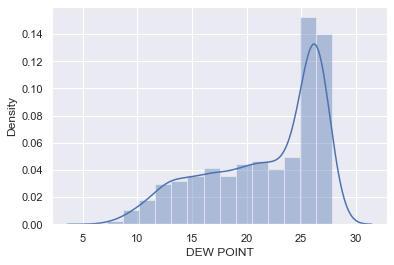

In [9]:
sns.distplot(df['DEW POINT'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


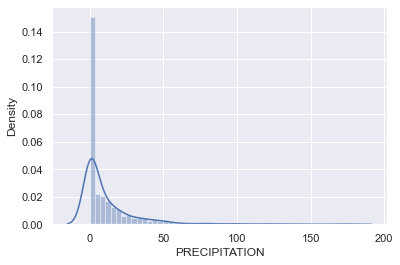

In [10]:
sns.distplot(df['PRECIPITATION'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


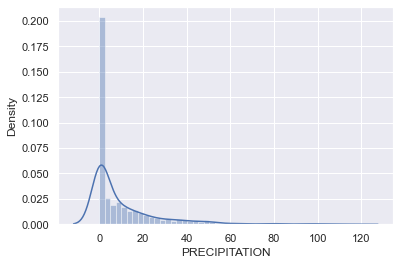

In [11]:
q = df['PRECIPITATION'].quantile(0.99)
data_1 = df[df['PRECIPITATION']<q]
sns.distplot(data_1['PRECIPITATION'])
plt.show()

In [12]:
data_cleaned = data_1.reset_index(drop=True)

In [13]:
data_cleaned = data_cleaned.drop(['LOW'],axis=1)

In [14]:
data_cleaned.corr()['HIGH']

YEAR                 0.288968
MONTH                0.361257
DAY                  0.016648
SURFACE PRESSURE    -0.561128
DEW POINT            0.563409
TEMPERATURE          0.243414
PRECIPITATION        0.360532
MAX WIND SPD         0.297386
RELATIVE HUMIDITY    0.493372
MIN TEMP             0.528253
N_ICE EXTENT        -0.648268
S_ICE EXTENT         0.673118
HIGH                 1.000000
Name: HIGH, dtype: float64

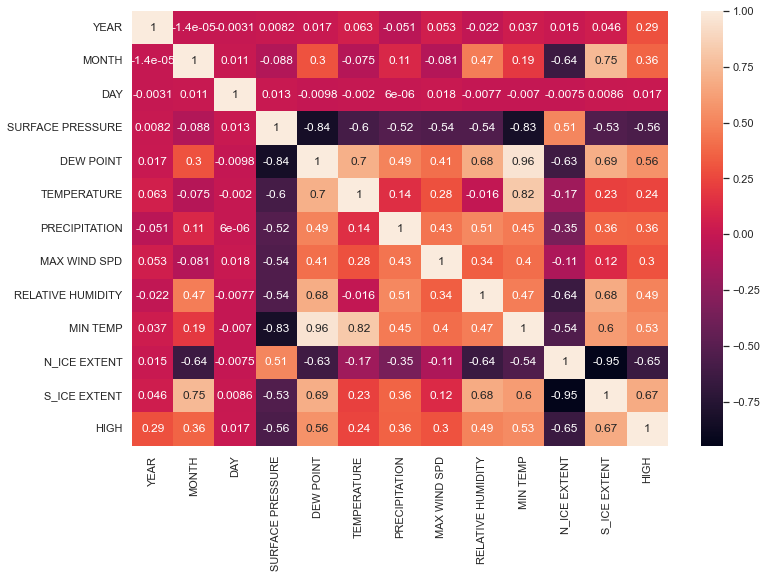

In [15]:
fig_dims = (12,8)
fig,ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data_cleaned.corr(), ax=ax,annot=True)
plt.show()

In [1212]:
data_cleaned = data_cleaned.drop(['DEW POINT'],axis=1)
data_cleaned = data_cleaned.drop(['MIN TEMP'],axis=1)
data_cleaned = data_cleaned.drop(['N_ICE EXTENT'],axis=1)
data_cleaned = data_cleaned.drop(['RELATIVE HUMIDITY'],axis=1)
data_cleaned.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,TEMPERATURE,PRECIPITATION,MAX WIND SPD,S_ICE EXTENT,HIGH
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,2019.504841,6.511065,15.737206,100.812994,29.103223,10.405422,6.196065,11.197965,1.847567
std,1.119647,3.462635,8.812626,0.551256,3.589857,16.945718,2.238856,5.745249,0.737436
min,2018.000000,1.000000,1.000000,99.110000,18.960000,0.000000,1.580000,2.200000,0.214910
25%,2019.000000,4.000000,8.000000,100.380000,26.802500,0.000000,4.700000,5.495500,1.311978
50%,2020.000000,6.500000,16.000000,100.860000,29.970000,2.200000,5.960000,11.870000,1.754955
75%,2021.000000,10.000000,23.000000,101.270000,31.220000,14.262500,7.270000,16.984000,2.406750
max,2021.000000,12.000000,31.000000,101.900000,38.740000,115.830000,22.950000,19.062000,3.977000


## Neural Network Regression

### Train-Test Split

In [1213]:
dataset = data_cleaned
train_dataset = dataset.sample(frac=0.8,random_state=22)
test_dataset = dataset.drop(train_dataset.index)

#### Separate the target value, or “label”, from the features. This label is the value that we will train the model to predict.

In [1214]:
train_labels = train_dataset.pop('HIGH')
test_labels = test_dataset.pop('HIGH')

### Scaling the Input Data

In [1215]:
scaler=MinMaxScaler()
scaler.fit(train_dataset)
normed_train_data = scaler.transform(train_dataset)
scaler.fit(test_dataset)
normed_test_data = scaler.transform(test_dataset)

### Model

In [1216]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  #optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [1217]:
NN_model = build_model()
NN_model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_177 (Dense)           (None, 64)                576       
                                                                 
 dense_178 (Dense)           (None, 64)                4160      
                                                                 
 dense_179 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


### Training

In [1218]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2500

history = NN_model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [1219]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
2495,0.013158,0.085043,0.013158,0.100167,0.221069,0.100167,2495
2496,0.011939,0.081119,0.011939,0.097319,0.221197,0.097319,2496
2497,0.014058,0.087447,0.014058,0.097600,0.223478,0.097600,2497
2498,0.013290,0.086410,0.013290,0.101144,0.224343,0.101144,2498
2499,0.011341,0.077459,0.011341,0.101025,0.226939,0.101025,2499


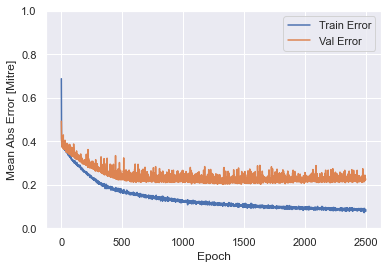

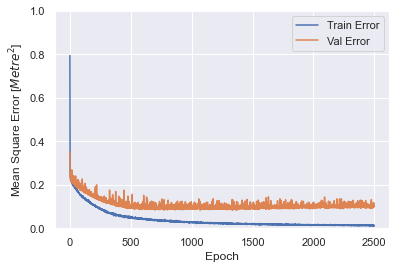

In [1220]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Mitre]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Metre^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [1221]:
#model = build_model()

#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

#plot_history(history)

### Testing

In [1222]:
loss, mae, mse = NN_model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} M".format(mae))

Testing set Mean Abs Error:  0.21 M


In [1223]:
y_pred_NN = NN_model.predict(normed_test_data)
Test_score_NN =r2_score(test_labels,y_pred_NN)
print("Testing Score: ",Test_score_NN)

Testing Score:  0.8319224594274957


### Visulizing Predictions

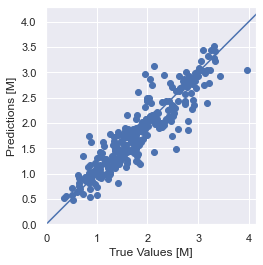

In [1224]:
y_pred_NN = NN_model.predict(normed_test_data).flatten()

plt.scatter(test_labels, y_pred_NN)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

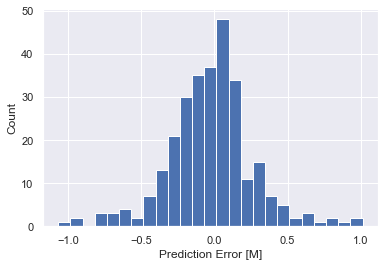

In [1225]:
error = y_pred_NN - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [M]")
_ = plt.ylabel("Count")
plt.show()

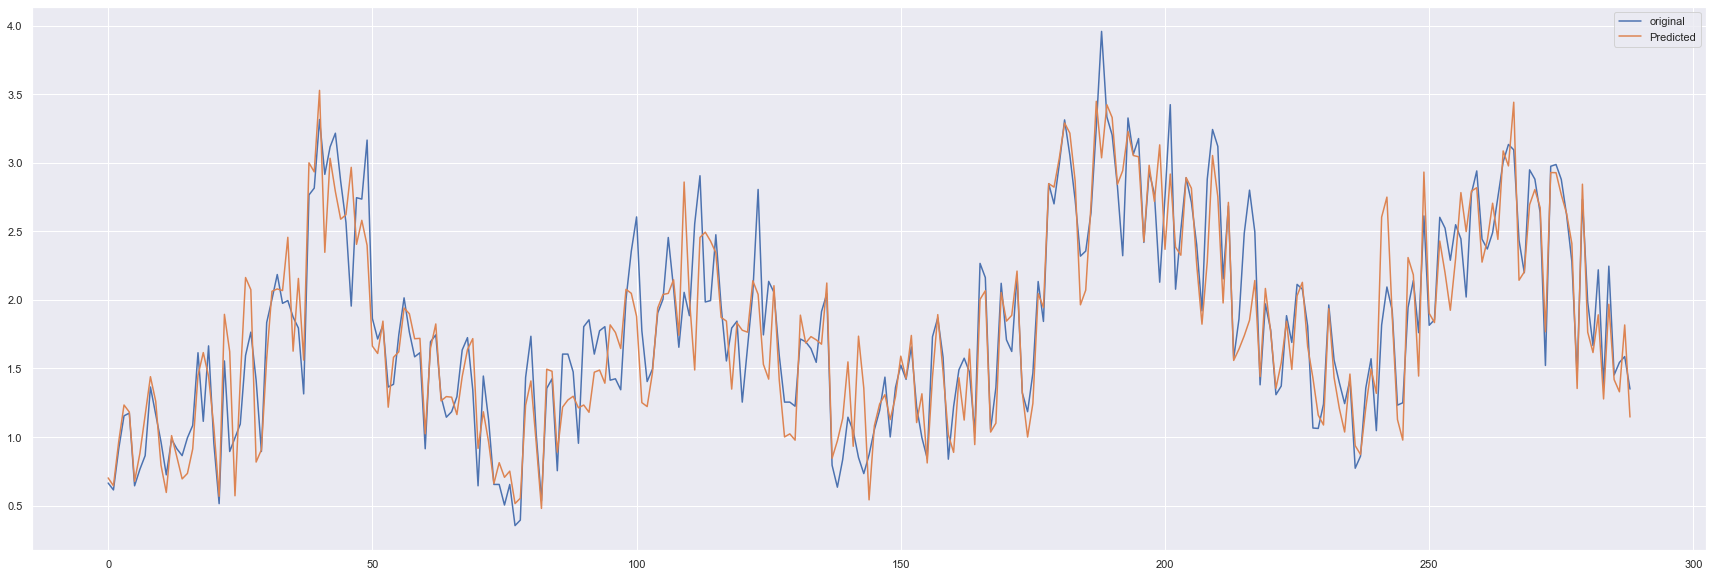

In [1226]:
x_ax = range(len(test_labels))
plt.figure(figsize=(30,10))
plt.plot(x_ax, test_labels,label="original")
plt.plot(x_ax, y_pred_NN, label="Predicted")
plt.legend()
plt.show()

In [1227]:
data_wmv = raw_data[raw_data.isnull().any(axis=1)]
data_wmv.head()

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW


In [1228]:
scaler=MinMaxScaler()
scaler.fit(data_wmv)
normed_inp_data = scaler.transform(data_wmv)

ValueError: Found array with 0 sample(s) (shape=(0, 14)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
test_predictions = NN_model.predict(normed_inp_data).flatten()
test_predictions